In [1]:
from astropy.cosmology import FlatLambdaCDM

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
from pygadget_utils import scatter_circles

In [6]:
from pygadget_utils import filter_by_region

In [7]:
run pygadget

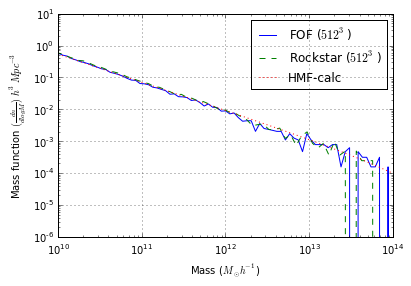

In [112]:
run halo_mass_function

In [8]:
run rockstar
rock = rockstar_load("/media/lbignone/simulations/lgzoom/out512/", 14)

In [47]:
basedirs = ["/media/lbignone/simulations/lgzoom/out512",
            "/media/lbignone/simulations/wmmw/R33306/10",
            "/media/lbignone/simulations/wmmw/R33306/11",
            ]

basename = "/snapshot"

nums = [14, 14, 19]

names = [9, 10, 11]

snaps = {}
fofs = {}
subs = {}
pos = {}
FOF = {}
SUB = {}

for basedir, num, name in zip(basedirs, nums, names):
    fname = basedir+basename+"_{0:03d}".format(num)
    snaps[name] = Simulation(fname, multiple_files=True)
    
    fofs[name] = Fof(basedir, num)
    FOF[name] = pd.DataFrame(fofs[name].groupcm, columns=["x", "y", "z"])
    
    subs[name] = Subfind(basedir, num, snap=snaps[name])
    SUB[name] = pd.DataFrame(subs[name].subpos, columns=["x", "y", "z"])
    SUB[name]['parent'] = pd.Series(subs[name].subparenthalo)
    FOF[name]['R200'] = pd.Series(subs[name].halo_r_crit200)

    pos[name] = snaps[name].read_block("pos", "halo")
    
    


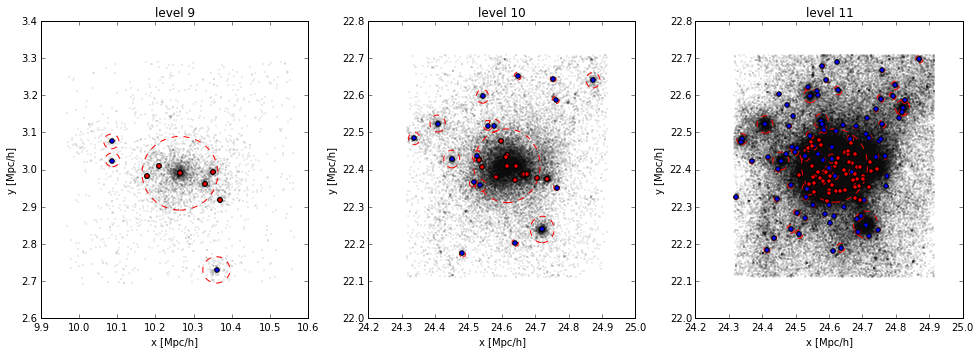

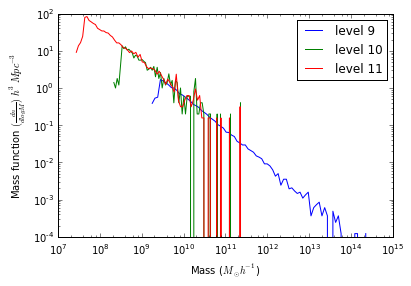

In [122]:
fig = plt.figure(figsize=(13.7, 5))

halo_id = 33306
dx = 300

plot_names = [9, 10, 11]
central_halos = {9:111180, 10:700, 11:4391}

x02 = {}
y02 = {}
z02 = {}
axes = {}

x02[9] = rock.X[halo_id] * 1000.0
y02[9] = rock.Y[halo_id] * 1000.0
z02[9] = rock.Z[halo_id] * 1000.0

x02[10] = fofs[10].groupcm[700][0]
y02[10] = fofs[10].groupcm[700][1]
z02[10] = fofs[10].groupcm[700][2]

x02[11] = x02[10]
y02[11] = y02[10]
z02[11] = z02[10]

for i, name in enumerate(plot_names):
    xmin = x02[name] - dx
    xmax = x02[name] + dx
    ymin = y02[name] - dx
    ymax = y02[name] + dx
    zmin = z02[name] - dx
    zmax = z02[name] + dx
    region_snap = filter_by_region(pos[name], xmin, xmax, ymin, ymax, zmin, zmax) 
    region_fof = filter_by_region(FOF[name], xmin, xmax, ymin, ymax, zmin, zmax)
    region_sub = filter_by_region(SUB[name], xmin, xmax, ymin, ymax, zmin, zmax)
    
    ax = plt.subplot2grid((1,len(plot_names)),(0, i))
    axes[name] = ax
    
    ax.scatter(region_snap.x/1000., region_snap.y/1000., s=0.01)
    
    scatter_circles(region_fof.x/1000., region_fof.y/1000., region_fof.R200/1000., linestyle="dashed", c="none", edgecolor="r")

    ax.scatter(region_sub.x/1000., region_sub.y/1000.)
    
    ax.scatter(region_sub[region_sub.parent == central_halos[name]].x/1000., region_sub[region_sub.parent == central_halos[name]].y/1000., c='r')
    
    ax.set_title("level {0:d}".format(name))
    ax.set_xlabel("x [Mpc/h]")
    ax.set_ylabel("y [Mpc/h]")

plt.tight_layout()
plt.savefig("R33306_fof_subfind.jpg")


fig = plt.figure()

box_length = 50.0  # box length in Mpc/h
V = box_length**3
N = 80

V = {9: 50.0**3, 10: 5.0**3, 11: 5.0**3}

for name in plot_names:
    submass = subs[name].sublen * snaps[name].particle_mass["halo"] * 1e10
    m, dndlogm = mass_function(submass, V[name], N)
    
    plt.plot(m, dndlogm, label="level {0:d}".format(name))
    
plt.xlabel(r"Mass ($M_\odot h^{-1}$)")
plt.ylabel(r"Mass function $(\frac{dn}{dlogM})$ $h^3 Mpc^{-3}$")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc=0)

plt.savefig("R33306_subhalo_mass_function.pdf")

In [111]:
submass

array([  2.33371726e+01,   4.66979378e-01,   2.91830056e-01, ...,
         3.20551468e-03,   4.10305879e-03,   3.71839702e-03])

In [90]:
sp.size

63

In [53]:
region_sub

,x,y,z,parent
691,24615.304688,22410.314453,25506.021484,700
692,24664.636719,22385.222656,25530.005859,700
693,24735.337891,22375.626953,25578.146484,700
694,24643.759766,22410.105469,25514.423828,700
695,24639.812500,22371.396484,25539.787109,700
696,24532.160156,22426.720703,25562.333984,700
697,24665.193359,22386.927734,25557.632812,700
698,24705.736328,22377.474609,25564.648438,700
699,24614.884766,22440.013672,25540.009766,700
700,24674.982422,22386.869141,25526.986328,700
